<a href="https://colab.research.google.com/github/ZeynepSudeIlerieee/LLMs/blob/main/llmmChapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 4: Implementing a GPT Model from Scratch To Generate Text

In [ ]:
!pip install tiktoken


In [ ]:
!pip install tiktoken


In [ ]:
import tiktoken
print(tiktoken.__version__)

0.9.0


In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
from importlib.metadata import version

print("matplotlib version:", version("matplotlib"))
print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))

matplotlib version: 3.10.0
torch version: 2.6.0+cu124
tiktoken version: 0.9.0


In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [ ]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

In [ ]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)


tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)

logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
torch.manual_seed(123)

# create 2 training examples with 5 dimensions (features) each
batch_example = torch.randn(2, 5)

layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)


tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [ ]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [ ]:
out_norm = (out - mean) / torch.sqrt(var)
print("Normalized layer outputs:\n", out_norm)

mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [ ]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [ ]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)

In [ ]:
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

print("Mean:\n", mean)
print("Variance:\n", var)


Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


4.3 Implementing a feed forward network with GELU activations


In [ ]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

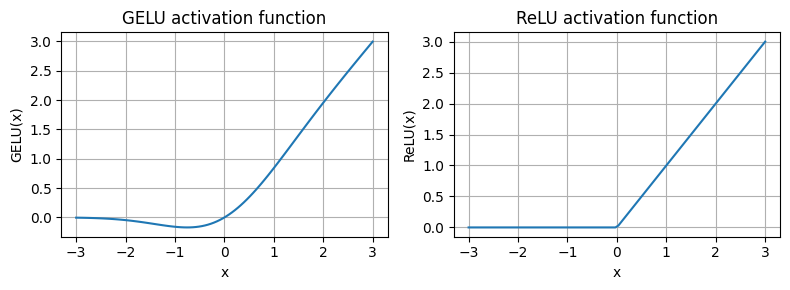

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
print(GPT_CONFIG_124M["emb_dim"])

768


In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)

# input shape: [batch_size, num_token, emb_size]
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


4.4 Adding shortcut connections

In [ ]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x


def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [ ]:
layer_sizes = [3, 3, 3, 3, 3, 1]

sample_input = torch.tensor([[1., 0., -1.]])

torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [ ]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


4.5 Connecting attention and linear layers in a transformer block

In [ ]:
from previous_chapters import MultiHeadAttention


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

In [ ]:
torch.manual_seed(123)

x = torch.rand(2, 4, 768)  # Shape: [batch_size, num_tokens, emb_dim]
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


4.6 Coding the GPT model

In [ ]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [ ]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [ ]:
total_params_gpt2 =  total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [ ]:
# Calculate the total size in bytes (assuming float32, 4 bytes per parameter)
total_size_bytes = total_params * 4

# Convert to megabytes
total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In [ ]:
start_context = "Hello, I am"

encoded = tokenizer.encode(start_context)
print("encoded:", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [ ]:
model.eval() # disable dropout

out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [ ]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


Chapter 4 Exercise solutions

In [ ]:
from importlib.metadata import version

print("torch version:", version("torch"))

torch version: 2.6.0+cu124


Exercise 4.1: Parameters in the feed forward versus attention module

In [ ]:
pip list | grep gpt


gpt                                0.2


In [ ]:
pip install gpt


In [ ]:
import gpt_1
print(dir(gpt))


['GPTHeader', 'GPTPartitionEntry', 'MBR', 'MBR_Partition', 'OS_TYPES', 'PARTITION_TYPE_GUIDS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'binascii', 'calculate_partition_entry_array_crc32', 'decode_gpt_header', 'decode_gpt_partition_entry', 'decode_gpt_partition_entry_array', 'decode_gpt_partition_entry_attributes', 'decode_gpt_partition_type_guid', 'decode_guid', 'decode_mbr', 'encode_gpt_header', 'encode_gpt_partition_entry', 'encode_gpt_partition_entry_array', 'encode_mbr', 'nts_to_str', 'pack', 'unpack', 'uuid']


In [ ]:
pip show gpt


Name: gpt
Version: 0.2
Summary: GPT utils
Home-page: https://github.com/metebalci/gpt
Author: Mete Balci
Author-email: metebalci@gmail.com
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
pip install transformers

In [ ]:
!pip show gpt


Name: gpt
Version: 0.2
Summary: GPT utils
Home-page: https://github.com/metebalci/gpt
Author: Mete Balci
Author-email: metebalci@gmail.com
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
!pip install gpt


In [ ]:
!pip install transformers



In [ ]:
from transformers import GPT2Model


In [ ]:
import gpt_1
print(dir(gpt))  # gpt içindeki nesneleri listele


['GPTHeader', 'GPTPartitionEntry', 'MBR', 'MBR_Partition', 'OS_TYPES', 'PARTITION_TYPE_GUIDS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'binascii', 'calculate_partition_entry_array_crc32', 'decode_gpt_header', 'decode_gpt_partition_entry', 'decode_gpt_partition_entry_array', 'decode_gpt_partition_entry_attributes', 'decode_gpt_partition_type_guid', 'decode_guid', 'decode_mbr', 'encode_gpt_header', 'encode_gpt_partition_entry', 'encode_gpt_partition_entry_array', 'encode_mbr', 'nts_to_str', 'pack', 'unpack', 'uuid']


In [ ]:
import gpt_1
print(dir(gpt))  # gpt modülündeki fonksiyonları/listeyi gösterir


['GPTHeader', 'GPTPartitionEntry', 'MBR', 'MBR_Partition', 'OS_TYPES', 'PARTITION_TYPE_GUIDS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'binascii', 'calculate_partition_entry_array_crc32', 'decode_gpt_header', 'decode_gpt_partition_entry', 'decode_gpt_partition_entry_array', 'decode_gpt_partition_entry_attributes', 'decode_gpt_partition_type_guid', 'decode_guid', 'decode_mbr', 'encode_gpt_header', 'encode_gpt_partition_entry', 'encode_gpt_partition_entry_array', 'encode_mbr', 'nts_to_str', 'pack', 'unpack', 'uuid']


In [ ]:
!pip install gpt
!pip install transformers



In [ ]:
from transformers import GPT2Model, GPT2Config

config = GPT2Config()
model = GPT2Model(config)
print(model)


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [ ]:
!pip install transformers  # Önce kütüphaneyi yükleyin (Colab için)
from transformers import GPT2Model  # Örnek bir GPT modeli

# Config yerine direkt bir model kullanabilirsiniz
model = GPT2Model.from_pretrained("gpt2")  # Küçük bir GPT-2 modeli
print(model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [ ]:
from gpt_1 import TransformerBlock

GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

block = TransformerBlock(GPT_CONFIG_124M)
print(block)

TransformerBlock(
  (att): MultiHeadAttention(
    (W_query): Linear(in_features=768, out_features=768, bias=False)
    (W_key): Linear(in_features=768, out_features=768, bias=False)
    (W_value): Linear(in_features=768, out_features=768, bias=False)
    (out_proj): Linear(in_features=768, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (ff): FeedForward(
    (layers): Sequential(
      (0): Linear(in_features=768, out_features=3072, bias=True)
      (1): GELU()
      (2): Linear(in_features=3072, out_features=768, bias=True)
    )
  )
  (norm1): LayerNorm()
  (norm2): LayerNorm()
  (drop_shortcut): Dropout(p=0.1, inplace=False)
)


In [ ]:
total_params = sum(p.numel() for p in block.ff.parameters())
print(f"Total number of parameters in feed forward module: {total_params:,}")

Total number of parameters in feed forward module: 4,722,432


In [ ]:
total_params = sum(p.numel() for p in block.att.parameters())
print(f"Total number of parameters in attention module: {total_params:,}")

Total number of parameters in attention module: 2,360,064


Exercise 4.2: Initialize larger GPT models

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}


def get_config(base_config, model_name="gpt2-small"):
    GPT_CONFIG = base_config.copy()

    if model_name == "gpt2-small":
        GPT_CONFIG["emb_dim"] = 768
        GPT_CONFIG["n_layers"] = 12
        GPT_CONFIG["n_heads"] = 12

    elif model_name == "gpt2-medium":
        GPT_CONFIG["emb_dim"] = 1024
        GPT_CONFIG["n_layers"] = 24
        GPT_CONFIG["n_heads"] = 16

    elif model_name == "gpt2-large":
        GPT_CONFIG["emb_dim"] = 1280
        GPT_CONFIG["n_layers"] = 36
        GPT_CONFIG["n_heads"] = 20

    elif model_name == "gpt2-xl":
        GPT_CONFIG["emb_dim"] = 1600
        GPT_CONFIG["n_layers"] = 48
        GPT_CONFIG["n_heads"] = 25

    else:
        raise ValueError(f"Incorrect model name {model_name}")

    return GPT_CONFIG


def calculate_size(model): # based on chapter code

    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters: {total_params:,}")

    total_params_gpt2 =  total_params - sum(p.numel() for p in model.out_head.parameters())
    print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

    # Calculate the total size in bytes (assuming float32, 4 bytes per parameter)
    total_size_bytes = total_params * 4

    # Convert to megabytes
    total_size_mb = total_size_bytes / (1024 * 1024)

    print(f"Total size of the model: {total_size_mb:.2f} MB")

In [ ]:
# Transformers kütüphanesini yükleyin
!pip install transformers

from transformers import GPT2Model, GPT2Config

# Farklı GPT-2 modellerini test etme
for model_abbrev in ("small", "medium", "large", "xl"):
    model_name = f"gpt2-{model_abbrev}" if model_abbrev != "small" else "gpt2"
    print(f"\nLoading {model_name}...")
    model = GPT2Model.from_pretrained(model_name)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters in {model_name}: {total_params:,}")


Loading gpt2...
Total number of parameters in gpt2: 124,439,808

Loading gpt2-medium...
Total number of parameters in gpt2-medium: 354,823,168

Loading gpt2-large...
Total number of parameters in gpt2-large: 774,030,080

Loading gpt2-xl...
Total number of parameters in gpt2-xl: 1,557,611,200


In [ ]:
!pip install transformers
from transformers import GPT2Model

for model_abbrev in ("small", "medium", "large", "xl"):
    model_name = f"gpt2-{model_abbrev}" if model_abbrev != "small" else "gpt2"
    print(f"\nLoading {model_name}...")
    model = GPT2Model.from_pretrained(model_name)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters in {model_name}: {total_params:,}")


Loading gpt2...
Total number of parameters in gpt2: 124,439,808

Loading gpt2-medium...
Total number of parameters in gpt2-medium: 354,823,168

Loading gpt2-large...
Total number of parameters in gpt2-large: 774,030,080

Loading gpt2-xl...
Total number of parameters in gpt2-xl: 1,557,611,200


Exercise 4.3: Using separate dropout parameters

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate_emb": 0.1,        # NEW: dropout for embedding layers
    "drop_rate_attn": 0.1,       # NEW: dropout for multi-head attention
    "drop_rate_shortcut": 0.1,   # NEW: dropout for shortcut connections
    "qkv_bias": False
}


In [ ]:
import torch.nn as nn
from gpt_1 import MultiHeadAttention, LayerNorm, FeedForward


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate_attn"], # NEW: dropout for multi-head attention
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate_shortcut"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed-forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x


class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate_emb"]) # NEW: dropout for embedding layers

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [ ]:
import torch

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

FLOPS Analysis

In [ ]:
!pip install thop


In [ ]:
from importlib.metadata import version

pkgs = [
    "thop",
    "torch",
]
for p in pkgs:
    print(f"{p} version: {version(p)}")

thop version: 0.1.1-2209072238
torch version: 2.6.0+cu124


Simple benchmark with fixed batch size
forward pass only

In [ ]:
!cat /content/previous_chapters.py

# Copyright (c) Sebastian Raschka under Apache License 2.0 (see LICENSE.txt).
# Source for "Build a Large Language Model From Scratch"
#   - https://www.manning.com/books/build-a-large-language-model-from-scratch
# Code: https://github.com/rasbt/LLMs-from-scratch

import tiktoken
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch

In [ ]:
%%writefile previous_chapters.py

import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        self.blocks = nn.ModuleList([TransformerBlock(cfg) for _ in range(self.n_layers)])
        self.out = nn.Linear(self.emb_dim, self.vocab_size)

    def forward(self, x):
        batch_size, seq_len = x.shape
        positions = torch.arange(seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        x = self.token_emb(x) + self.pos_emb(positions)
        for block in self.blocks:
            x = block(x)
        return self.out(x)

Overwriting previous_chapters.py


In [ ]:
!cat /content/previous_chapters.py


import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        sel

In [ ]:
# thop’u yükle
!pip install thop

# Config
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# Import ve test
import sys
sys.path.insert(0, '/content')  # Colab’ın dosyayı bulması için
from thop import profile
from previous_chapters import GPTModel
import torch

# Modeli oluştur
model = GPTModel(GPT_CONFIG_124M)

# Örnek giriş tensoru (thop için gerekli)
input_tensor = torch.zeros(1, GPT_CONFIG_124M["context_length"], dtype=torch.long)

# FLOPs ve parametre sayısını hesapla
flops, params = profile(model, inputs=(input_tensor,))
print(f"Total FLOPs: {flops:,}")
print(f"Total parameters: {params:,}")

ImportError: cannot import name 'GPTModel' from 'previous_chapters' (/content/previous_chapters.py)

In [ ]:
!ls /content/previous_chapters.py

/content/previous_chapters.py


In [ ]:
import torch
from thop import profile

from previous_chapters import GPTModel


BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 2
input_tensor = torch.randint(0, 50257, (batch_size, 1024)).to(device)

for size in model_configs:
    BASE_CONFIG.update(model_configs[size])

    model = GPTModel(BASE_CONFIG).bfloat16()
    model.to(device)

    # MACS = multiply-accumulate operations
    # MACS are typically counted as two FLOPS (one multiply and one accumulate)
    macs, params = profile(model, inputs=(input_tensor,), verbose=False)
    flops = 2*macs
    print(f"{size:18}: {flops:.1e} FLOPS")

    del model
    torch.cuda.empty_cache()

ImportError: cannot import name 'GPTModel' from 'previous_chapters' (/content/previous_chapters.py)

In [ ]:
%%writefile previous_chapters.py

import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        self.blocks = nn.ModuleList([TransformerBlock(cfg) for _ in range(self.n_layers)])
        self.out = nn.Linear(self.emb_dim, self.vocab_size)

    def forward(self, x):
        batch_size, seq_len = x.shape
        positions = torch.arange(seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        x = self.token_emb(x) + self.pos_emb(positions)
        for block in self.blocks:
            x = block(x)
        return self.out(x)

Overwriting previous_chapters.py


In [ ]:
!cat /content/previous_chapters.py


import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        sel

In [ ]:
!ls /content/previous_chapters.py

/content/previous_chapters.py


In [ ]:
!cat /content/previous_chapters.py


import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        sel

In [ ]:
%%writefile previous_chapters.py

import torch
import torch.nn as nn
from gpt_1 import MultiHeadAttention, FeedForward, LayerNorm

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate_attn"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate_shortcut"])

    def forward(self, x):
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        return x

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate_emb"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

Overwriting previous_chapters.py


In [ ]:
# thop’u yükle
!pip install thop

# Config
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# Import ve test
import sys
sys.path.insert(0, '/content')  # Colab’ın dosyayı bulması için
from thop import profile
from previous_chapters import GPTModel
import torch

# Modeli oluştur
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

# Örnek giriş tensoru (thop için gerekli)
input_tensor = torch.zeros(1, GPT_CONFIG_124M["context_length"], dtype=torch.long)

# FLOPs ve parametre sayısını hesapla
flops, params = profile(model, inputs=(input_tensor,))
print(f"Total FLOPs: {flops:,}")
print(f"Total parameters: {params:,}")

ImportError: cannot import name 'GPTModel' from 'previous_chapters' (/content/previous_chapters.py)

In [ ]:
!cat previous_chapters.py


# Copyright (c) Sebastian Raschka under Apache License 2.0 (see LICENSE.txt).
# Source for "Build a Large Language Model From Scratch"
#   - https://www.manning.com/books/build-a-large-language-model-from-scratch
# Code: https://github.com/rasbt/LLMs-from-scratch

import tiktoken
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch

In [ ]:
%%writefile previous_chapters.py

import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.n_heads = cfg["n_heads"]
        self.drop_rate = cfg["drop_rate"]
        self.attention = nn.MultiheadAttention(self.emb_dim, self.n_heads, dropout=self.drop_rate)
        self.ff = nn.Sequential(
            nn.Linear(self.emb_dim, self.emb_dim),
            nn.ReLU()
        )

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        out = self.ff(attn_output)
        return out

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.vocab_size = cfg["vocab_size"]
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        self.n_layers = cfg["n_layers"]
        self.token_emb = nn.Embedding(self.vocab_size, self.emb_dim)
        self.pos_emb = nn.Embedding(self.context_length, self.emb_dim)
        self.blocks = nn.ModuleList([TransformerBlock(cfg) for _ in range(self.n_layers)])
        self.out = nn.Linear(self.emb_dim, self.vocab_size)

    def forward(self, x):
        batch_size, seq_len = x.shape
        positions = torch.arange(seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        x = self.token_emb(x) + self.pos_emb(positions)
        for block in self.blocks:
            x = block(x)
        return self.out(x)

Overwriting previous_chapters.py


In [ ]:
# Config
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# Import ve test
import sys
sys.path.insert(0, '/content')  # Colab’ın dosyayı bulması için
from previous_chapters_1 import GPTModel
import torch

# Modeli oluştur
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_feature

In [ ]:
import torch
from thop import profile

from previous_chapters_1 import GPTModel


BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 2
input_tensor = torch.randint(0, 50257, (batch_size, 1024)).to(device)

for size in model_configs:
    BASE_CONFIG.update(model_configs[size])

    model = GPTModel(BASE_CONFIG).bfloat16()
    model.to(device)

    # MACS = multiply-accumulate operations
    # MACS are typically counted as two FLOPS (one multiply and one accumulate)
    macs, params = profile(model, inputs=(input_tensor,), verbose=False)
    flops = 2*macs
    print(f"{size:18}: {flops:.1e} FLOPS")

    del model
    torch.cuda.empty_cache()

gpt-small (124M)  : 5.1e+11 FLOPS
gpt-medium (355M) : 1.4e+12 FLOPS
gpt-large (774M)  : 3.2e+12 FLOPS


Simple benchmark with automatic batch size finding

In [ ]:
for size in model_configs:
    print(f"\nProcessing {size}")
    config = BASE_CONFIG.copy()
    config.update(model_configs[size])

    min_batch_size = 1
    max_batch_size = None
    max_possible_batch_size = 4096

    while min_batch_size <= max_possible_batch_size:
        batch_size = (min_batch_size + max_possible_batch_size) // 2
        try:
            input_tensor = torch.randint(
                0, config["vocab_size"],
                (batch_size, config["context_length"]),
                device=device
            )

            model = GPTModel(config).bfloat16().to(device)

            # MACS = multiply-accumulate operations
            # MACS are typically counted as two FLOPS (one multiply and one accumulate)
            macs, params = profile(model, inputs=(input_tensor,), verbose=False)
            flops = 2 * macs
            print(f"  Batch size {batch_size}: {flops:.1e} FLOPS")

            # If successful, try a larger batch size
            min_batch_size = batch_size + 1
            max_batch_size = batch_size

            # Clean up
            del model, input_tensor
            torch.cuda.empty_cache()

        except RuntimeError as e:
            if "out of memory" in str(e):
                # Try smaller batch size
                max_possible_batch_size = batch_size - 1

                # Clean up
                try:
                    del model, input_tensor
                    torch.cuda.empty_cache()
                except NameError:
                    pass
            else:
                raise e

Benchmark with automatic batch size finding and Model FLOP Utilization (MFU)
Model FLOPs Utilization (MFU) explanation from the PaLM paper
We propose a new metric for efficiency that is implementation-independent and permits a cleaner comparison of system efficiency, called model FLOPs utilization (MFU). This is the ratio of the observed throughput (tokens-per-second) relative to the theoretical maximum throughput of a system operating at peak FLOPs. Crucially, the “theoretical maximum” throughput only accounts for the required operations to compute the forward+backward passes, and not rematerialization.



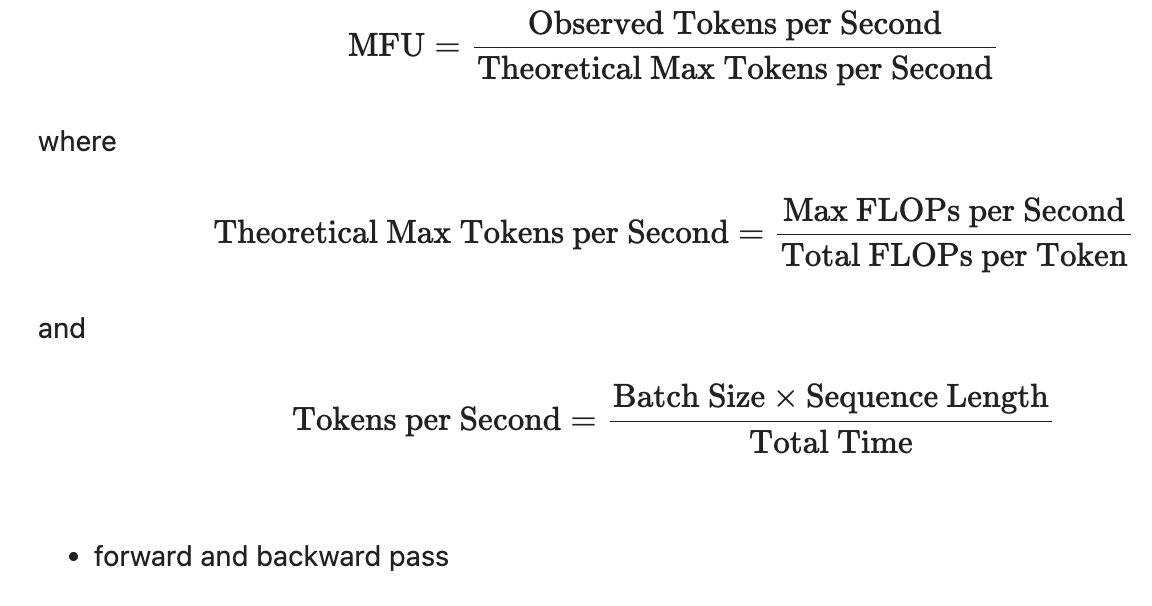

In [ ]:
# Theoretical max flops per second provided by the GPU manufacturer

flops_per_second = {
    # https://www.techpowerup.com/gpu-specs/h100-pcie-80-gb.c3899
    "H100": {
        torch.float32: 51.22e12,  # 51.22 TFLOPs for FP32 on NVIDIA H100
        torch.float16: 204.9e12,  # 204.9 TFLOPs for FP16 on NVIDIA H100
        torch.bfloat16: 204.9e12
    },
    # https://www.techpowerup.com/gpu-specs/l4.c4091
    "L4": {
        torch.float32: 30.29e12,  # 30.29 TFLOPs for FP32 on NVIDIA L4
        torch.float16: 30.29e12,  # 30.29 TFLOPs for FP16 on NVIDIA L4
        torch.bfloat16: 30.29e12
    },
    # https://www.techpowerup.com/gpu-specs/tesla-t4.c3316
    "T4": {
        torch.float32: 8.1e12,  # 8.1 TFLOPs for FP32 on NVIDIA T4
        torch.float16: 65.13e12,  # 65.13 TFLOPs for FP16 on NVIDIA T4
        torch.bfloat16: 65.13e12
    },
    # https://www.techpowerup.com/gpu-specs/a10g.c3798
    "A10G": {
        torch.float32: 31.52e12,  # 31.52 TFLOPs for FP32 on NVIDIA A10G
        torch.float16: 31.52e12,  # 31.52 TFLOPs for FP16 on NVIDIA A10G
        torch.bfloat16: 31.52e12
    },
    # https://www.techpowerup.com/gpu-specs/a100-pcie-40-gb.c3623
    "A100": {
        torch.float32: 19.49e12,  # 19.49 TFLOPs for FP32 on NVIDIA A100
        torch.float16: 77.97e12,  # 77.97 TFLOPs for FP16 on NVIDIA A100
        torch.bfloat16: 77.97e12
    },
    # https://www.techpowerup.com/gpu-specs/geforce-rtx-3080.c3621
    "RTX_3080": {
        torch.float32: 29.77e12,  # 29.77 TFLOPs for FP32 on NVIDIA RTX 3080
        torch.float16: 29.77e12,  # 29.77 TFLOPs for FP16 on NVIDIA RTX 3080
        torch.bfloat16: 29.77e12
    },
    # https://www.techpowerup.com/gpu-specs/geforce-rtx-3090.c3622
    "RTX_3090": {
        torch.float32: 35.58e12,  # 35.58 TFLOPs for FP32 on NVIDIA RTX 3090
        torch.float16: 35.58e12,  # 35.58 TFLOPs for FP16 on NVIDIA RTX 3090
        torch.bfloat16: 35.58e12
    }
}

In [ ]:
import time

def get_gpu_model(flops_per_second_dict):
    device_name = torch.cuda.get_device_name(0)
    for model in flops_per_second_dict.keys():
        if model in device_name:
            return model
    return "Unknown"  # Default if no matching model is found


gpu_model = get_gpu_model(flops_per_second)
print("GPU Model:", gpu_model)

if gpu_model != "Unknown":

    for size in model_configs:
        print(f"\nProcessing {size}")
        config = BASE_CONFIG.copy()
        config.update(model_configs[size])

        min_batch_size = 1
        max_batch_size = None
        max_possible_batch_size = 4096

        while min_batch_size <= max_possible_batch_size:
            batch_size = (min_batch_size + max_possible_batch_size) // 2
            try:
                input_tensor = torch.randint(
                    0, config["vocab_size"],
                    (batch_size, config["context_length"]),
                    device=device
                )

                model = GPTModel(config).bfloat16().to(device)
                model.train()

                # Start timing
                torch.cuda.synchronize()
                start_time = time.time()

                # Forward & backward pass
                output = model(input_tensor)
                loss = output.sum()  # Compute a dummy loss
                loss.backward()

                # End timing
                torch.cuda.synchronize()
                end_time = time.time()

                total_time_seconds = end_time - start_time

                # Calculate FLOPs for forward pass
                macs, params = profile(model, inputs=(input_tensor,), verbose=False)
                flops_forward = 2 * macs  # Assuming one MAC equals two FLOPs

                # Estimate FLOPs for backward pass (typically 2x forward FLOPs)
                flops_backward = 2 * flops_forward

                # Total FLOPs for forward + backward passes
                total_flops = flops_forward + flops_backward  # Or total_flops = flops_forward * 3

                data_type = next(model.parameters()).dtype
                max_flops_per_second = flops_per_second[gpu_model].get(data_type, 0)

                # Compute tokens per second
                tokens_processed = batch_size * config["context_length"]
                tokens_per_second = tokens_processed / total_time_seconds

                # Compute FLOPs per token
                flops_per_token = total_flops / tokens_processed

                # Compute theoretical max tokens per second
                if flops_per_token > 0:
                    theoretical_max_tokens_per_second = max_flops_per_second / flops_per_token
                else:
                    theoretical_max_tokens_per_second = 0  # Avoid division by zero

                # Compute MFU
                if theoretical_max_tokens_per_second > 0:
                    mfu = tokens_per_second / theoretical_max_tokens_per_second
                else:
                    mfu = 0  # Avoid division by zero

                print(f"  Batch size {batch_size}: Tokens/sec: {tokens_per_second:.2f}, MFU: {mfu:.4f}")

                # If successful, try a larger batch size
                min_batch_size = batch_size + 1
                max_batch_size = batch_size

                # Clean up
                del model, input_tensor, output, loss
                torch.cuda.empty_cache()

            except RuntimeError as e:
                if "out of memory" in str(e).lower():
                    # Try smaller batch size
                    max_possible_batch_size = batch_size - 1

                    # Clean up
                    try:
                        del model, input_tensor
                        torch.cuda.empty_cache()
                    except NameError:
                        pass
                else:
                    raise e

else:
    print("Unknown GPU model. Please update the flops_per_second dictionary with your GPU information.")